### Dataset Info
Real world data comprising of 747 spam messages and 4824 non-spam messages

link to dataset: https://archive.ics.uci.edu/dataset/228/

## Data Preparation
#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading in dataset and re-naming columns

In [2]:
df = pd.read_csv('SMSSpamCollection',sep='\t')

In [3]:
df.columns = ['label','text']

In [4]:
df

,label,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


#### Converting label from string to integer

In [5]:
df['label'] = df['label'].replace('ham',0)

In [6]:
df['label'] = df['label'].replace('spam',1)

## Data Analysis
#### Checking for null values

In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5571 non-null   int64 
 1   text    5571 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


#### Noticing that the dataset is imbalanced

In [9]:
df['label'].value_counts()

label
0    4824
1     747
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

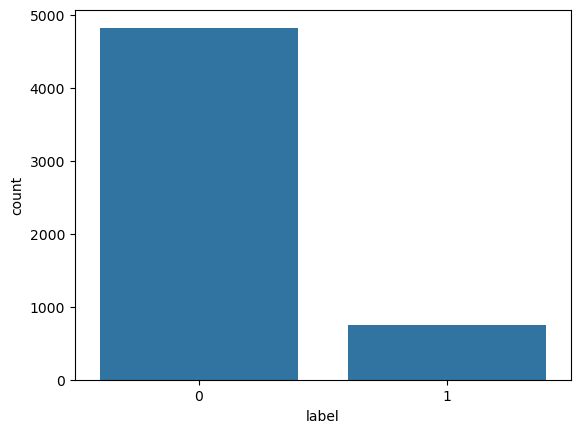

In [10]:
sns.countplot(df,x='label')

### Natural Language Processing
#### Changing from text features to a matrix of tf-idf features

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words='english',max_df=0.95,min_df=2)

In [13]:
tfidf.fit(df['text'])
X = tfidf.transform(df['text'])

In [14]:
y = df['label']

#### Performing train-test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [17]:
X_train.shape

(4735, 3964)

In [18]:
from sklearn.svm import SVC

## Creating SVC model
#### Using linear kernel because it performs exceptionally well on high-dimensional, sparse data like tfidf matrix
#### setting probabilty to true so that I can plot roc curve

In [19]:
svc_model = SVC(kernel='linear',C=1,probability=True)

In [20]:
svc_model.fit(X_train,y_train)

SVC(C=1, kernel='linear', probability=True)

In [21]:
y_pred = svc_model.predict(X_test)

In [22]:
class_one_prob = svc_model.predict_proba(X_test)[:,1]

## Evaluating Performance

In [23]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay, roc_auc_score,accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.9856459330143541

In [25]:
roc_auc_score(y_test,class_one_prob)

0.9903464590964591

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       728
           1       0.98      0.91      0.94       108

    accuracy                           0.99       836
   macro avg       0.98      0.95      0.97       836
weighted avg       0.99      0.99      0.99       836



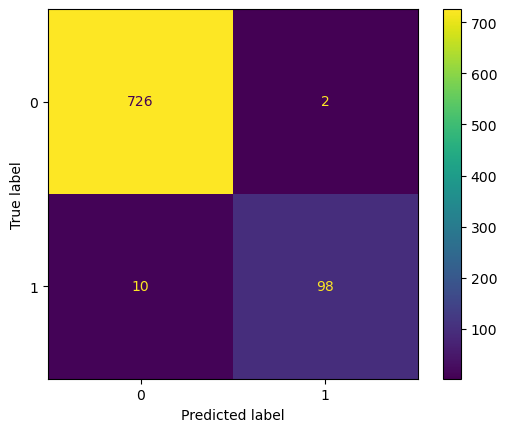

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

#### Model has an accuracy of 98%
#### Roc of 99% meaning it can separate between spam and not spam correctly 99% of the time
#### Recall score of 91% : accurately predicted spam 91% of the time

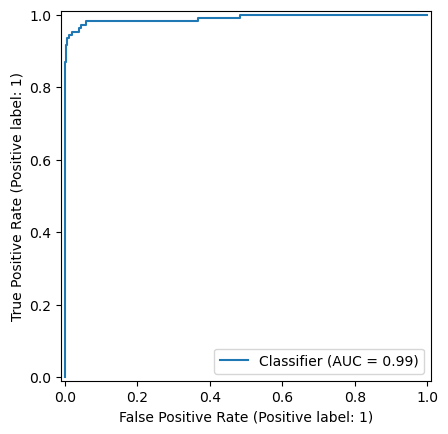

In [28]:
RocCurveDisplay.from_predictions(y_test,class_one_prob)

## Saving model
#### Retraining on all the data

In [29]:
from joblib import dump,load

In [30]:
svc_model.fit(X,y)

SVC(C=1, kernel='linear', probability=True)

In [31]:
dump(svc_model,'text_spam_model.joblib')

['text_spam_model.joblib']

In [32]:
dump(tfidf,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## loading model to test example

In [33]:
model = load('text_spam_model.joblib')

In [34]:
model

SVC(C=1, kernel='linear', probability=True)

In [35]:
tfidf_vect = load('tfidf_vectorizer.pkl')

In [36]:
sample_text_one = ['Im coming home soon']
sample_text_two = ['win lucky free']

In [37]:
X_new = tfidf_vect.transform(sample_text_one)
X_sus = tfidf_vect.transform(sample_text_two)

In [38]:
model.predict(X_new)

array([0], dtype=int64)

In [39]:
model.predict(X_sus)

array([1], dtype=int64)